Instalamos el entorno y las bibliotecas necesarias


In [1]:
!pip install -q gym matplotlib

In [2]:
import gym #para el juego
import random #para generar números aleatorios
import numpy as np #para hacer algunos cálculos

Definición de estados:

S: starting point, safe  
F: frozen surface, safe  
H: hole, stuck forever  
G: goal, safe  

In [3]:
# Inicializar el entorno no resbaladizo de Frozen Lake
environment = gym.make("FrozenLake-v1",render_mode="ansi", is_slippery=False)
environment.reset()
environment.render()

'\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n'

In [37]:
# Inicializar Q-table con ceros
# Nuestra "table" tiene las siguientes dimensiones:
# (filas x columnas) = (estados x acciones) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternativamente, la biblioteca "gym" también puede directamente darnos el número de estados y acciones usando
# "env.observation_space.n" y "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Veamos cómo se ve
print('Q-table =')
print(qtable)
contador=0
for x in qtable:
    for y in x:
        print(type(x[contador]))
        y = int(y)
        print(type(y))
        # print(contador)
        contador = contador+1
        if contador ==4:
            contador = 0
        print(x[contador])
        x[contador] = y
        print(type(y))
        print(type(x[contador]))
        print("terminado_")
        
    print(x)
    # print(type(x[0]))


Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
[0. 0. 0. 0.]
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<class 'numpy.float64'>
terminado_
<class 'numpy.float64'>
<class 'int'>
0.0
True
<class 'int'>
<c

In [5]:
random.choice(["LEFT", "DOWN", "RIGHT", "UP"])

'UP'

In [6]:
environment.action_space.sample()

3

In [7]:
environment.step(2)
environment.render()

'  (Right)\nS\x1bF\x1bFF\nFHFH\nFFFH\nHFFG\n'

In [9]:
# 1. Elegir aleatoriamente una acción utilizando action_space.sample()
action = environment.action_space.sample()

# 2. Implementar esta acción y mover el agente en la dirección deseada
new_state, reward, done, info,otrodato = environment.step(action)

# Mostramos los resultados (recompensa y mapa)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


In [10]:
# Importar matplotlib para trazar los resultados
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Número total de episodios
alpha = 0.5            # Tasa de aprendizaje
gamma = 0.9            # Factor de descuento

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un hoyo o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # Si no hay una mejor acción (solo ceros), elige una al azar
        else:
          action = environment.action_space.sample()

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s, a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # Si no hay una mejor acción (solo ceros), elegimos una al azar
        else:
          action = environment.action_space.sample()

        # Implementamos esta acción y movemos el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
from IPython.display import clear_output
import time

state = environment.reset()
done = False
sequence = []

while not done:
    # Elija la acción con el valor más alto en el estado actual
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # Si no hay una mejor acción (solo ceros), elige una al azar
    else:
      action = environment.action_space.sample()

    # Añade la acción a la secuencia.
    sequence.append(action)

    # Implementamos esta acción y movemos el agente en la dirección deseada.
    new_state, reward, done, info = environment.step(action)

    # Actualizar nuestro estado actual
    state = new_state

    # Actualizar el renderizado
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")


Sequence = [1, 1, 2, 2, 1, 2]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59046368]
 [0.59048993 0.729      0.59039256 0.65585989]
 [0.65608765 0.         0.5092098  0.57144793]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65601871]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80999994 0.9        0.72899985]
 [0.81       0.9        1.         0.81      ]
 [0.

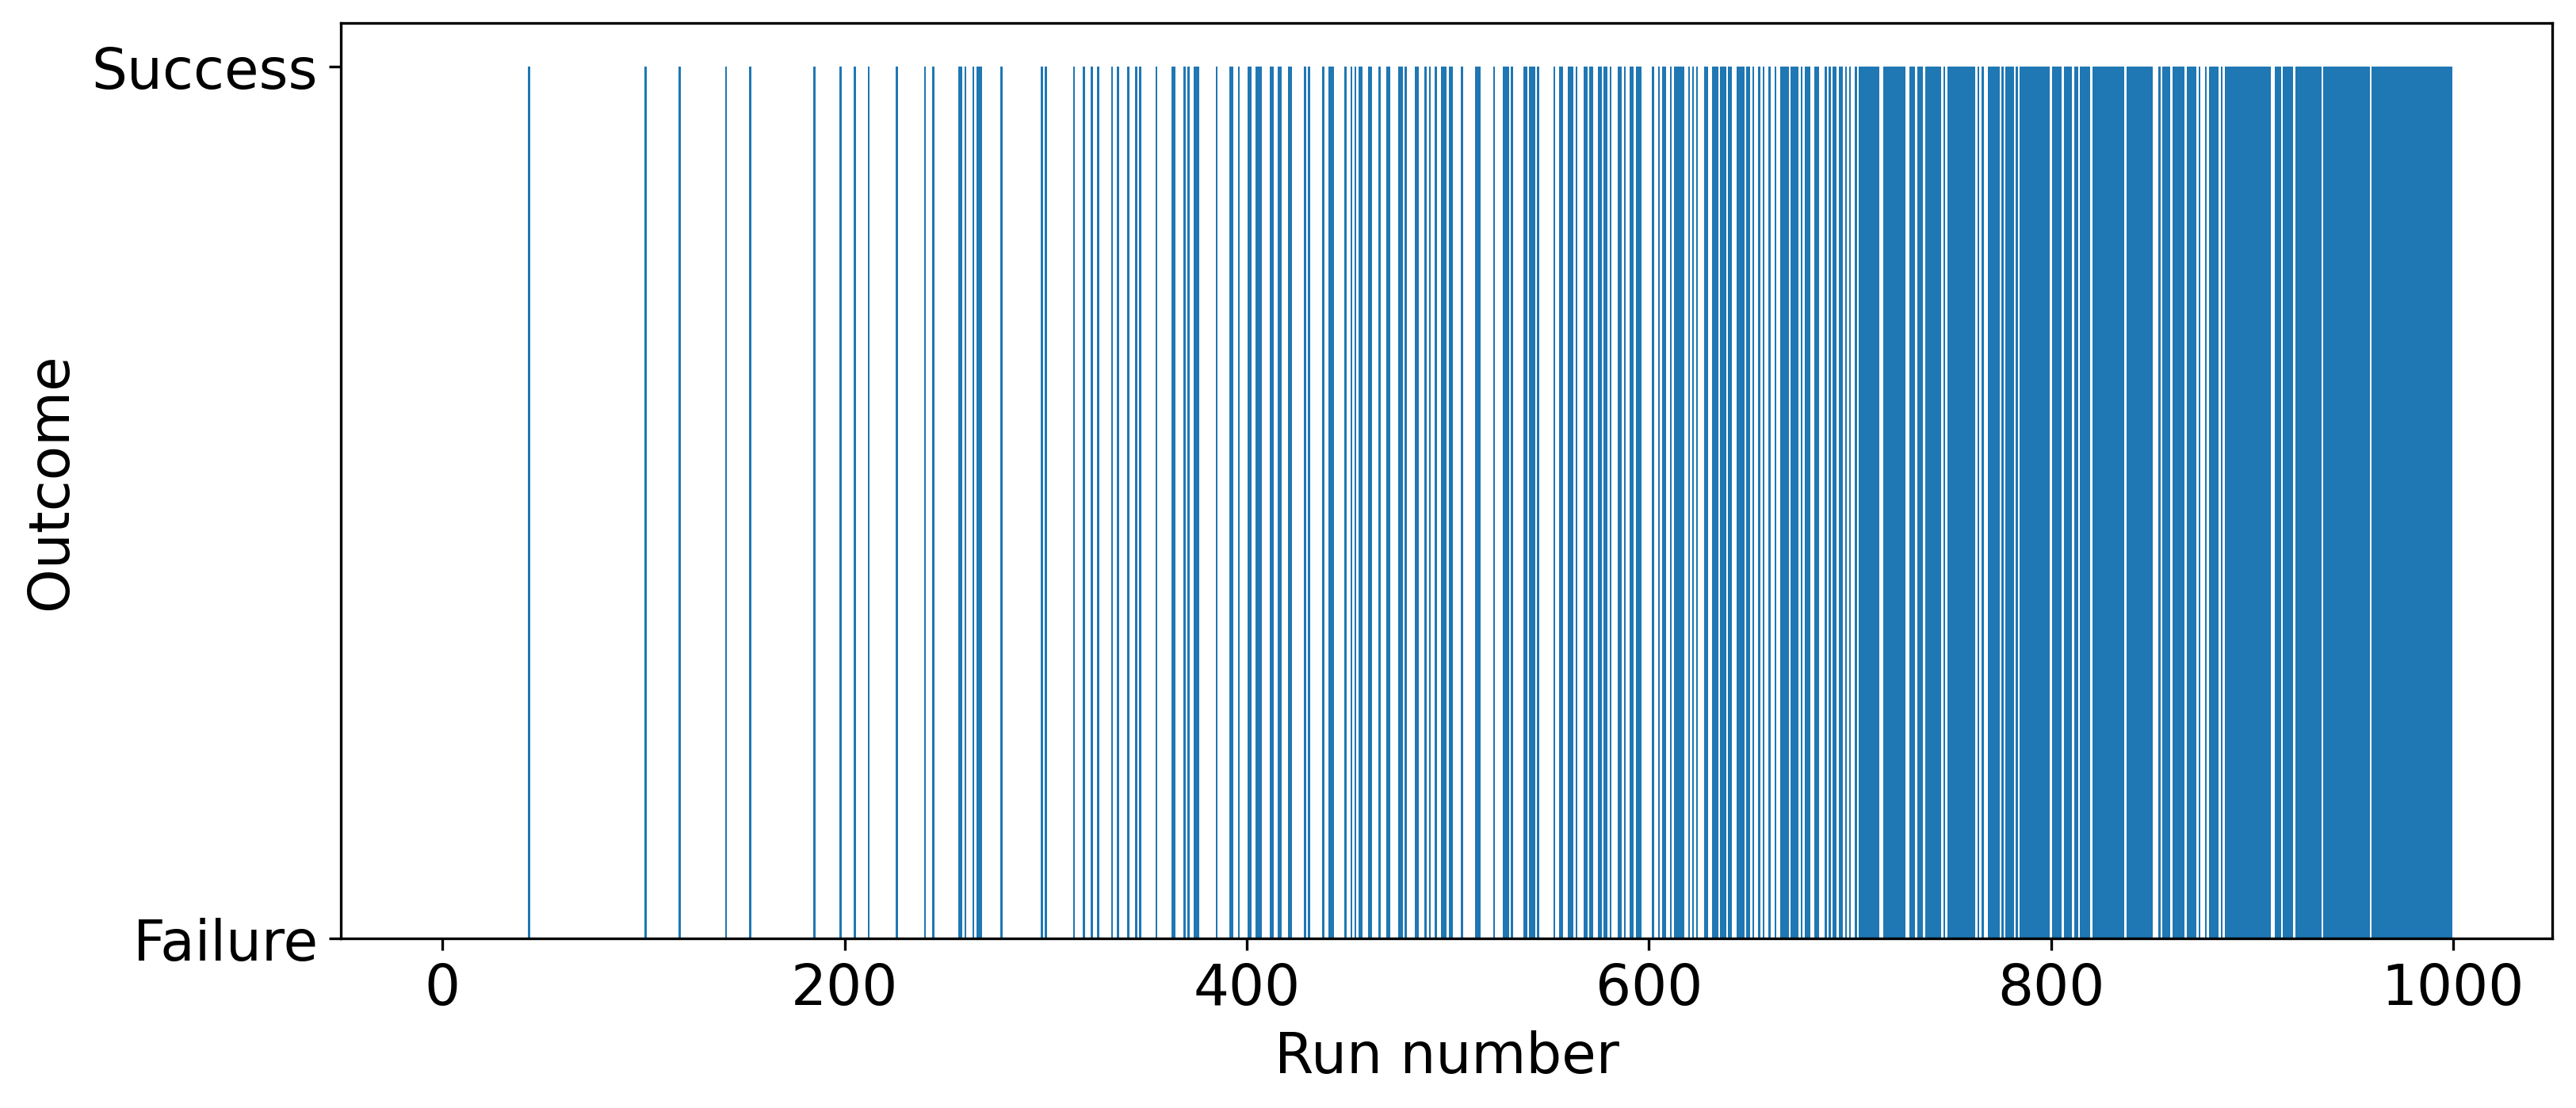

In [12]:
# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Número total de episodios
alpha = 0.5            # Tasa de aprendizaje
gamma = 0.9            # Factor de descuento
epsilon = 1.0          # Cantidad de aleatoriedad en la selección de acciones.
epsilon_decay = 0.001  # Cantidad fija a disminuir

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        # Genera un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < épsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment.action_space.sample()
        # De lo contrario, realice la acción con el valor más alto en el estado actual.
        else:
          action = np.argmax(qtable[state])

        # Implementamos esta acción y movemos el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizamos Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

    # Actualizar épsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [13]:
episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.03741024 0.02543819 0.02414247 0.02503343]
 [0.00999299 0.01382183 0.01046139 0.01921394]
 [0.02144711 0.01407809 0.01531369 0.0159449 ]
 [0.00665517 0.00699007 0.00677363 0.01290889]
 [0.03733211 0.03037764 0.02254607 0.00212699]
 [0.         0.         0.         0.        ]
 [0.00388509 0.00654024 0.00576474 0.0058665 ]
 [0.         0.         0.         0.        ]
 [0.03400473 0.04868082 0.04863689 0.04727847]
 [0.03950152 0.14123367 0.01592617 0.05247333]
 [0.06547378 0.07892251 0.06612337 0.04490551]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08664293 0.15169889 0.31637483 0.19758104]
 [0.26057751 0.7279404  0.35560782 0.29084753]
 [0.

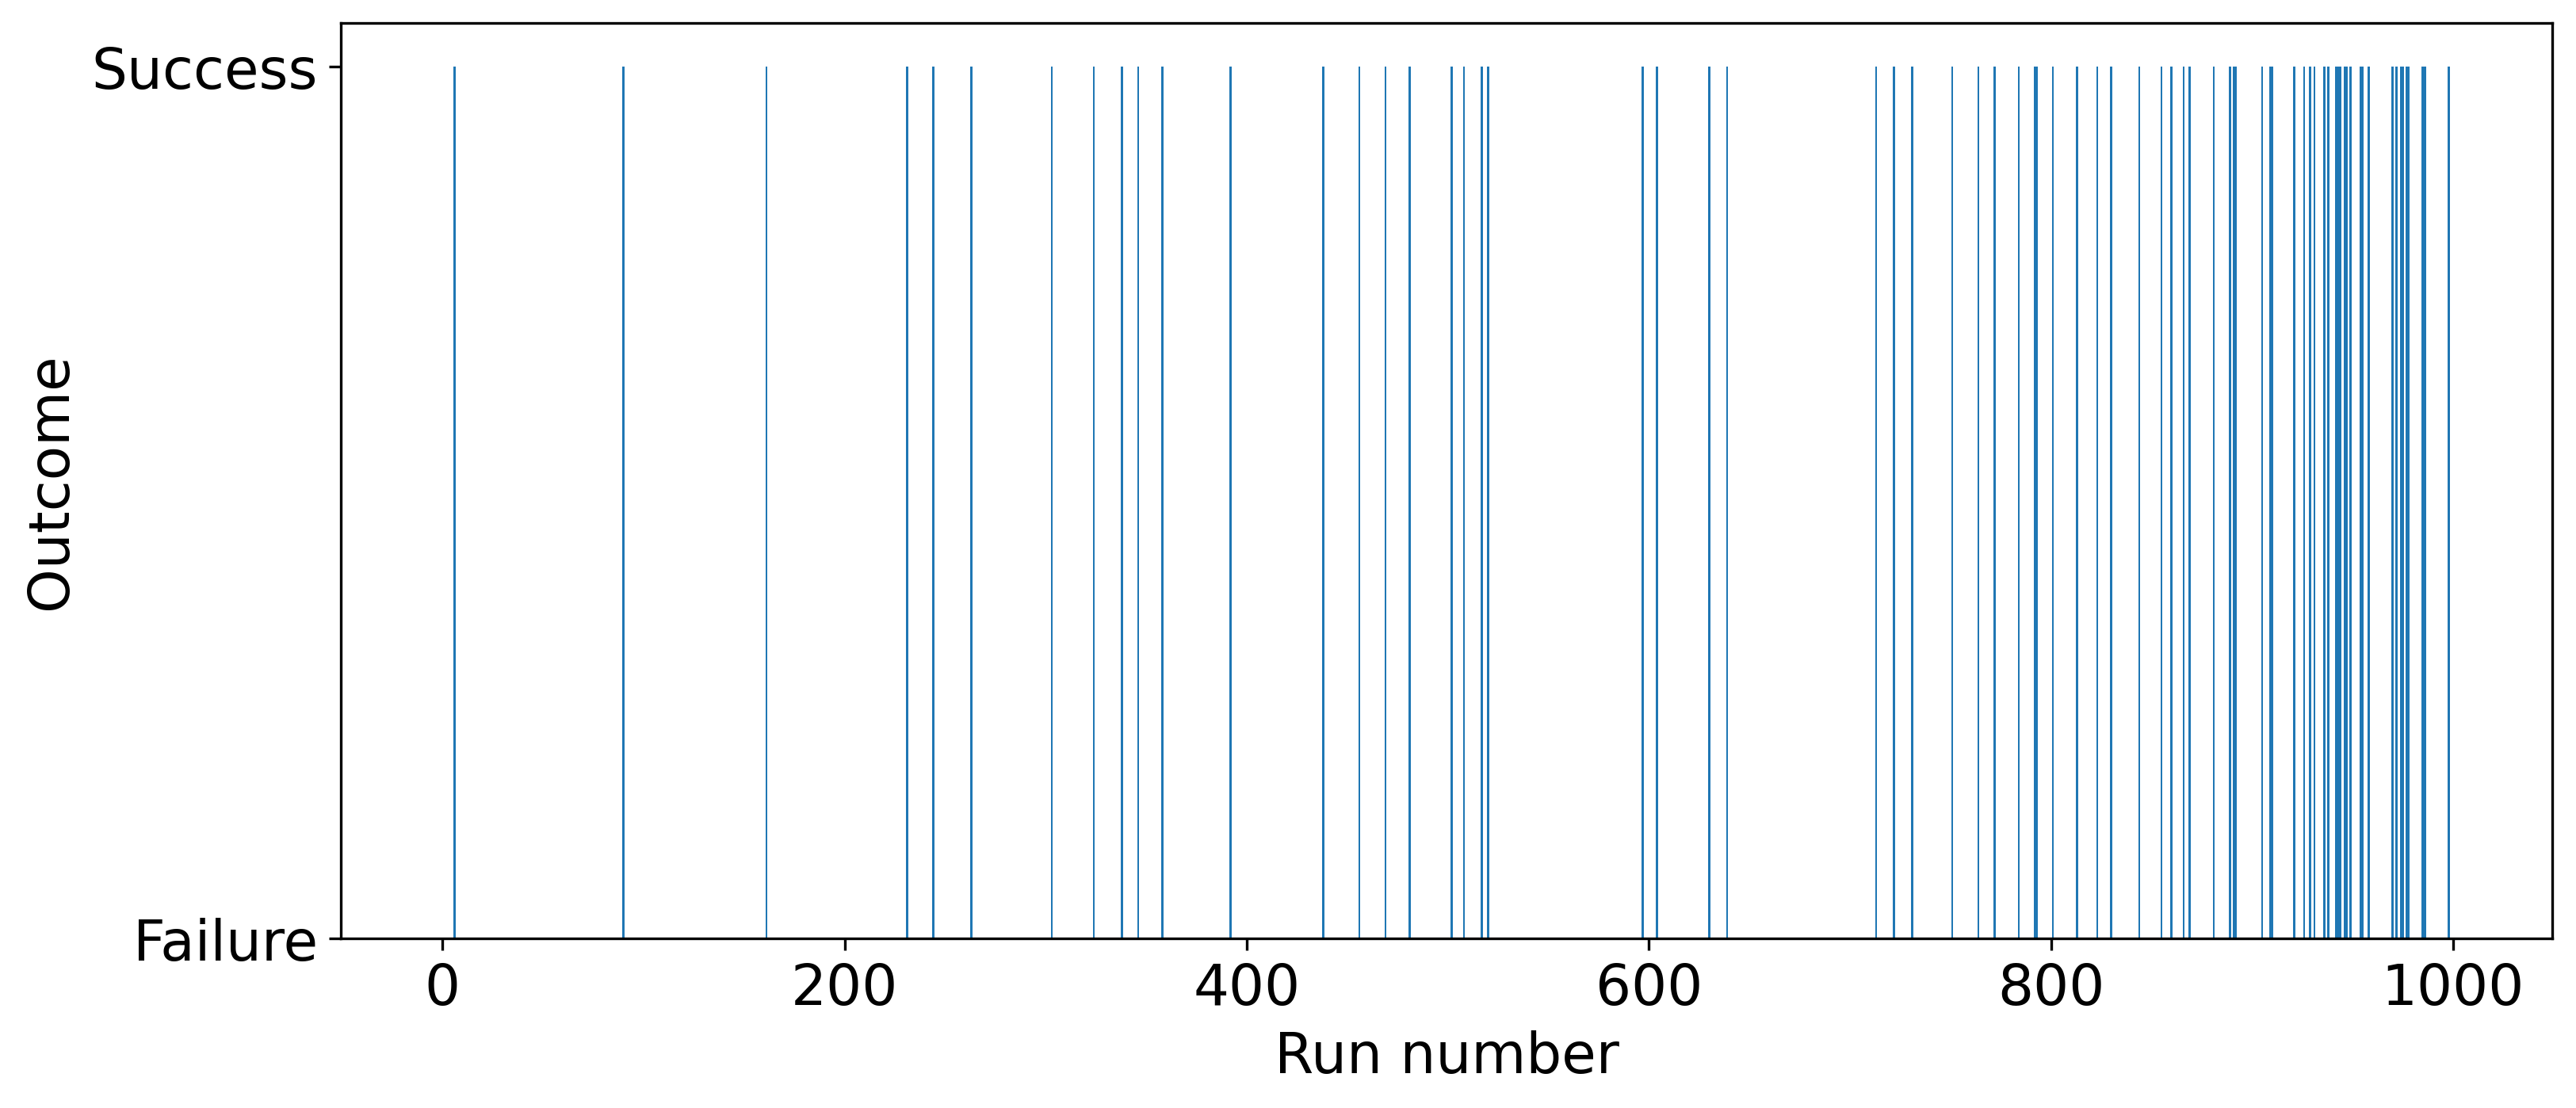

Success rate = 19.0%


In [14]:
# Inicializa el resbaladizo lago congelado
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Capacitación
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        #Genera un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < épsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment.action_space.sample()
        # De lo contrario, realice la acción con el valor más alto en el estado actual.
        else:
          action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

    # Actualizar épsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Resultados de la trama
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")